# **Product category analysis**

### **Step 1: Import libraries**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

### **Step 2: Load data**

In [12]:
df = pd.read_csv('data/products.csv')

### **Step 3: Initial exploration**

In [13]:
print(df.head())
print(df.isna().sum())
print(df['Category Label'].unique())

   product ID                                      Product Title  Merchant ID  \
0           1                    apple iphone 8 plus 64gb silver            1   
1           2                apple iphone 8 plus 64 gb spacegrau            2   
2           3  apple mq8n2b/a iphone 8 plus 64gb 5.5 12mp sim...            3   
3           4                apple iphone 8 plus 64gb space grey            4   
4           5  apple iphone 8 plus gold 5.5 64gb 4g unlocked ...            5   

  Category Label _Product Code  Number_of_Views  Merchant Rating  \
0  Mobile Phones    QA-2276-XC            860.0              2.5   
1  Mobile Phones    KA-2501-QO           3772.0              4.8   
2  Mobile Phones    FP-8086-IE           3092.0              3.9   
3  Mobile Phones    YI-0086-US            466.0              3.4   
4  Mobile Phones    NZ-3586-WP           4426.0              1.6   

   Listing Date    
0       5/10/2024  
1      12/31/2024  
2      11/10/2024  
3        5/2/2022  
4   

### **Step 4: Clean data**

In [14]:
df = df.dropna(subset=['Product Title', 'Category Label'])
df['Category Label'] = df['Category Label'].str.lower().str.strip()

### **Step 5: Feature Engineering**

In [15]:
df['title_word_count'] = df['Product Title'].apply(lambda x: len(str(x).split()))
df['title_char_count'] = df['Product Title'].apply(lambda x: len(str(x)))
df['title_digit_count'] = df['Product Title'].apply(lambda x: sum(c.isdigit() for c in str(x)))

### **Step 6: Split data**

In [16]:
X = df['Product Title']  # later combine with extra features
y = df['Category Label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### **Step 7: Vectorize text**

In [17]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)

### **Step 8: Train multiple models and evaluate**


Logistic Regression
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        17
            cpus       0.98      1.00      0.99       749
 digital cameras       0.99      0.99      0.99       538
     dishwashers       0.94      0.96      0.95       681
        freezers       0.97      0.93      0.95       440
          fridge       0.00      0.00      0.00        25
 fridge freezers       0.93      0.93      0.93      1094
         fridges       0.85      0.90      0.87       687
      microwaves       0.99      0.96      0.98       466
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.95      0.99      0.97       801
             tvs       0.98      0.98      0.98       708
washing machines       0.96      0.93      0.95       803

        accuracy                           0.95      7020
       macro avg       0.73      0.74      0.73      7020
    weighted avg       0.94      0.95      0.95  

c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

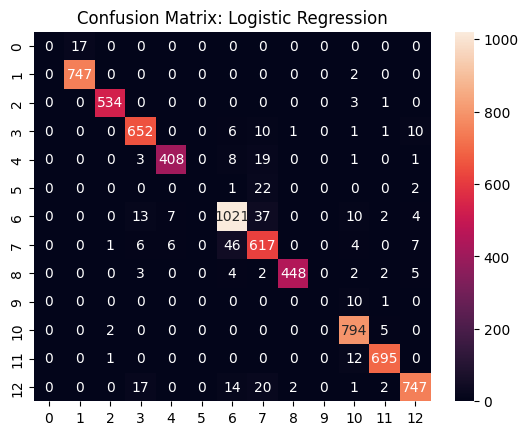


Naive Bayes
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        17
            cpus       0.98      1.00      0.99       749
 digital cameras       0.99      1.00      0.99       538
     dishwashers       0.99      0.92      0.95       681
        freezers       0.99      0.60      0.75       440
          fridge       0.00      0.00      0.00        25
 fridge freezers       0.74      0.97      0.84      1094
         fridges       0.86      0.79      0.83       687
      microwaves       0.99      0.97      0.98       466
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.98      0.99      0.98       801
             tvs       0.98      0.99      0.99       708
washing machines       0.97      0.94      0.95       803

        accuracy                           0.92      7020
       macro avg       0.73      0.70      0.71      7020
    weighted avg       0.92      0.92      0.92      7020

c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

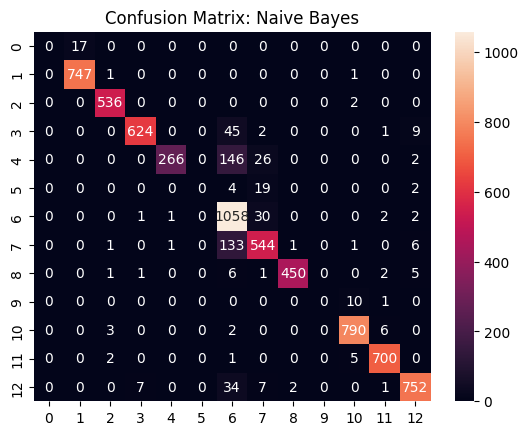


Linear SVC
                  precision    recall  f1-score   support

             cpu       0.00      0.00      0.00        17
            cpus       0.98      1.00      0.99       749
 digital cameras       0.99      1.00      1.00       538
     dishwashers       0.93      0.96      0.94       681
        freezers       0.97      0.94      0.95       440
          fridge       0.00      0.00      0.00        25
 fridge freezers       0.95      0.94      0.94      1094
         fridges       0.86      0.90      0.88       687
      microwaves       0.99      0.97      0.98       466
    mobile phone       0.00      0.00      0.00        11
   mobile phones       0.96      1.00      0.98       801
             tvs       0.99      0.98      0.99       708
washing machines       0.97      0.93      0.95       803

        accuracy                           0.95      7020
       macro avg       0.74      0.74      0.74      7020
    weighted avg       0.95      0.95      0.95      7020


c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\hidan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(ave

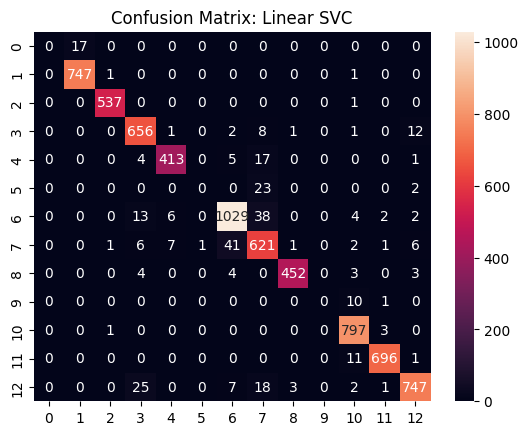

In [18]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Naive Bayes': MultinomialNB(),
    'Linear SVC': LinearSVC()
}

for name, model in models.items():
    model.fit(X_train_vect, y_train)
    y_pred = model.predict(X_test_vect)
    print(f"\n{name}")
    print(classification_report(y_test, y_pred))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d')
    plt.title(f"Confusion Matrix: {name}")
    plt.show()